# Pandas Tutorial

In this lab session, we'll go through some useful ways to use [Pandas](https://pandas.pydata.org/) for data science. As is the case with the previous tutorial, this is NOT a comprehensive Pandas tutorial, but rather a collection of tips and useful fucntions that I expect you to use for the labs, exams, and courseworks of the course.

* This is a self-paced tutorial, but make sure to take some time on this week to get familiar with the concepts.
* If you find any part of this tutorial complicated, please prepare a list of questions for the beginning of the next lab.
* The usual: the canonical answer to any of you questions is probably contained in the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html) and [Documentation](https://pandas.pydata.org/docs/)
* Similar to NumPy, Pandas is one of the essential tools for data science with Python, and if you're serious about data science as a career, you should take as long as you need to become proficient with the tool. I believe the best place to start is the [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) tutorial.

## Table of Contents

1. [Series](#Series)
2. [DataFrames](#DataFrames)
3. [Indexing](#Indexing)
4. [Long vs narrow data](#Long-vs-narrow-data)
5. [Useful patterns](#Useful-patterns)
6. [Copies and Views](#Copies-and-Views)


In [3]:
import numpy as np
import pandas as pd
from tutorials.utils import *

## Series

Pandas, like NumPy, provides most of its functionality by providing data structures and functions that operate on such structures. The first data structure is the [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). 

At the very core, a Series is a one-dimensional NumPy ndarray that supports axis labels. This immediately offers some advantages when compared to a ndarray. To see some of these advantages, let's create some Series below

In [4]:
# let's start by creating an alphabetic index for our ndarray
index = list(alpha_range(5))

# then, let's create a one-dimensional ndarray that will hold the data for our Series
data = np.arange(5)

print(f"index: {index}")
print(f"data: {data}")

# Now we can create a that uses the index to name each of the componens of our one-dimensional ndarray
s1 = pd.Series(data, index=index)

print(f"Series:\n{s1}")

# By default the index is simply a range that enumerates each component
rng = np.random.default_rng(0)
s2 = pd.Series(rng.random(5))

print(f"Series with default index:\n{s2}")

index: ['a', 'b', 'c', 'd', 'e']
data: [0 1 2 3 4]
Series:
a    0
b    1
c    2
d    3
e    4
dtype: int32
Series with default index:
0    0.636962
1    0.269787
2    0.040974
3    0.016528
4    0.813270
dtype: float64


notice how the `Series` object not only holds the data and the index, but also some metadata such as the type.

### `Series` as a `ndarray`

`Series` objects are ndarray-like. This means that most NumPy operators will operate on a `Series`, including the slicing operations:

In [5]:
print(f"s1:\n{s1}")

# Notice how slicing this series to reverse it works exactly like it does for a ndarray,
# but it reverses also the index. This is extremely useful for keeping sorted indices consistent
# with the data. 
print(f"\ns1[-1::-1]:\n{s1[::-1]}")

# It also support the NumPy advanced slicing
# In this example, you can see also that the index is not necessarily unique.

print(f"\ns1[[0,1,0,3]]:\n{s1[[0,1,0,3]]}")

s1:
a    0
b    1
c    2
d    3
e    4
dtype: int32

s1[-1::-1]:
e    4
d    3
c    2
b    1
a    0
dtype: int32

s1[[0,1,0,3]]:
a    0
b    1
a    0
d    3
dtype: int32


D:\user\B51063\AppData\Local\Temp\ipykernel_2052\2293061075.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\ns1[[0,1,0,3]]:\n{s1[[0,1,0,3]]}")


### `Series` as a Python `dict`

A convenient way to access and modify values on a `Series` is using the Python `dict` syntax:

In [6]:
print(f"s1[\"a\"]: {s1['a']}")

s1["a"] = 20

print(f's1["a"]: {s1["a"]}')

print("\nCase with non-unique indices\n")


# We create now a series with distinct values, but repeated indices
s3 = pd.Series(np.arange(5), index=["a", "b", "a", "b", "a"])

print(f"Original Series s3:\n{s3}")

s3["a"] = 0

print(f'\nAfter modifying the "a" key s3:\n{s3}')

# Notice also that using repeated indices will return all values that match the selected index
print(f'\ns3["b"]:\n{s3["b"]}')


s1["a"]: 0
s1["a"]: 20

Case with non-unique indices

Original Series s3:
a    0
b    1
a    2
b    3
a    4
dtype: int32

After modifying the "a" key s3:
a    0
b    1
a    0
b    3
a    0
dtype: int32

s3["b"]:
b    1
b    3
dtype: int32


### `Series` operations

Like `ndarrays`, `Series` offers a large collection of functions and operators for a single or multiple series:

In [7]:
print(f"s1:\n{s1}\n")
print(f"s2:\n{s2}\n")
print(f"s3:\n{s3}\n")

print(f"s1.mean(): {s1.mean()}\n")
print(f"s2.median(): {s2.median()}\n")
print(f"pd.concat([s1, s2]):\n{pd.concat([s1, s2])}\n")

# Notices this special case, where s1 and s3 share only some of the indices. 
# The rules that establish how the operators will be mapped is known as "alignment", 
# and we'll see it later in the tutorial
print(f"s1 + s3:\n{s1 + s3}")

s1:
a    20
b     1
c     2
d     3
e     4
dtype: int32

s2:
0    0.636962
1    0.269787
2    0.040974
3    0.016528
4    0.813270
dtype: float64

s3:
a    0
b    1
a    0
b    3
a    0
dtype: int32

s1.mean(): 6.0

s2.median(): 0.2697867137638703

pd.concat([s1, s2]):
a    20.000000
b     1.000000
c     2.000000
d     3.000000
e     4.000000
0     0.636962
1     0.269787
2     0.040974
3     0.016528
4     0.813270
dtype: float64

s1 + s3:
a    20.0
a    20.0
a    20.0
b     2.0
b     4.0
c     NaN
d     NaN
e     NaN
dtype: float64


## DataFrames

While `Series` is the basic data structure of Pandas, by far the most used data structure is the Pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

The easiest (although incorrect) way to think about a `DataFrame` is a 2-dimensional `Series` object. This is mostly because a `DataFrame` can be heterogeneous on the types of each of the series that compose it.

For those used to dealing with spreadsheets and SQL tables, a `DataFrame` will feel quite familiar. However, much like a `ndarray` is not a mathematical vector, a `DataFrame` is NOT a 2-dimensional ndarray, nor a SQL table, nor an Excel spreadsheet, even though many operations that apply to those objects apply to the `DataFrame` in very similar ways. A `DataFrame` is a unique data structure that inherits many properties of `Series` and `ndarray`.

A special characteristic of a `DataFrame` is that its two dimensions are _labeled_, meaning you have a `Series`-like index on the rows and the columns of the data.

In [8]:
# Let's create our first DataFrame as a dictionary of Series
s1 = pd.Series(np.arange(5), index=alpha_range(5))
s2 = pd.Series(np.arange(3), index=alpha_range(3))
s3 = pd.Series(np.arange(4), index=alpha_range(4))

print(f"s1:\n{s1}\n")
print(f"s2:\n{s2}\n")
print(f"s3:\n{s3}\n")

data = {
    'one': s1, 
    'two': s2, 
    'three': s3
}
# we simply pass this dictionary to the constructor, and we get our first DataFrame
df = pd.DataFrame(data)

# if we print it, we get a text table
print(df)

# Because we're in a notebook, we can inspect the variable "as is" and get a web-friendly table
df

s1:
a    0
b    1
c    2
d    3
e    4
dtype: int32

s2:
a    0
b    1
c    2
dtype: int32

s3:
a    0
b    1
c    2
d    3
dtype: int32

   one  two  three
a    0  0.0    0.0
b    1  1.0    1.0
c    2  2.0    2.0
d    3  NaN    3.0
e    4  NaN    NaN


,one,two,three
a,0,0.0,0.0
b,1,1.0,1.0
c,2,2.0,2.0
d,3,NaN,3.0
e,4,NaN,NaN


### Data Alignment in Pandas

The `DataFrame` we created above is convenient to explain the concept of data alignment in Pandas.

Notice how `s1` is the only `Series` with 5 indices (`a` to `e`). `s2` and `s3` share 3, and 4 of those letter respectively.

Because the underlying representation a `DataFrame` must have _something_ on the coordinates where data was not provided, it will fill this empty spaces with the default NumPy representation for missing data: `np.nan` (printed as `NaN`)

Notice that the `int64` data type was changed to something else for columns `two` and `three`, this is because `np.nan` is defined as a `float` value in NumPy, and therefore all the Series was cast into `float64`:

In [9]:
df.dtypes

one        int32
two      float64
three    float64
dtype: object

### The `Series` in a `DataFrame`

let's dissect the `DataFrame` s bit more, and see if we can reveal some more of the underlying data structure:

In [10]:
print(f'df["one"]:\n{df["one"]}\n')
print(type(df["one"]))

df["one"]:
a    0
b    1
c    2
d    3
e    4
Name: one, dtype: int32

<class 'pandas.core.series.Series'>


We can see that a column is actually a `Series`, let's see one of the rows:

In [11]:
print(f'df.loc["d"]:\n{df.loc["d"]}\n')
print(type(df.loc["d"]))

df.loc["d"]:
one      3.0
two      NaN
three    3.0
Name: d, dtype: float64

<class 'pandas.core.series.Series'>


Again, when we extract a row, we get a `Series`. Notice, however that the `3` on the `one` index of this `Series` was cast into `3.0` (`int64` -> `float64`)

## Indexing

We've seen some Numpy-like indexing above, which are the most intuitive and straightforward ways to select subsets of the data in Pandas. 

During the course, we won't need much advanced indexing, but it's very important that you read the [User Guide](https://pandas.pydata.org/docs/user_guide/indexing.html), as the flexibility of data selection in Pandas can become very complex an confusing. Here, I simply provide some useful examples that should be useful for the course.

To start, let's load a dataset of Clinical Trials downloaded in 2020 from [ClinicalTrials.gov](https://clinicaltrials.gov/) and that were related to COVID-19

In [12]:
clinical_trials = pd.read_table('data/clinical_trials-raw.tsv')
clinical_trials

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04372602,Duvelisib to Combat COVID-19,NaN,Recruiting,No Results Available,COVID-19,Drug: Duvelisib|Procedure: Peripheral blood dr...,Overall survival|Length of hospital stay|Lengt...,Washington University School of Medicine|Veras...,...,202007009,"October 12, 2020","November 30, 2021","April 30, 2022","May 4, 2020",NaN,"November 9, 2020","Washington University School of Medicine, Sain...",NaN,https://ClinicalTrials.gov/show/NCT04372602
1,2,NCT04364698,Observational Cohort of COVID-19 Patients at R...,COVID-RPC,Recruiting,No Results Available,COVID-19,NaN,"clinical, biological and radiological characte...",Assistance Publique - Hôpitaux de Paris,...,20SBS-COVID-RPC,"May 7, 2020",June 2020,June 2020,"April 28, 2020",NaN,"May 14, 2020","Department of Infectiology, Raymond Poincaré H...",NaN,https://ClinicalTrials.gov/show/NCT04364698
2,3,NCT04482621,Decitabine for Coronavirus (COVID-19) Pneumoni...,DART,Recruiting,No Results Available,COVID-19,Drug: Decitabine|Other: Placebo Saline,Change in clinical state as assessed by a 6-po...,Johns Hopkins University,...,IRB00247544,"September 14, 2020",May 2021,July 2021,"July 22, 2020",NaN,"September 25, 2020","Johns Hopkins University, Baltimore, Maryland,...",NaN,https://ClinicalTrials.gov/show/NCT04482621
3,4,NCT04459637,COVID-19 Surveillance Based on Smart Wearable ...,COVID-19SWD,Not yet recruiting,No Results Available,COVID-19,NaN,Deterioration of the condition|Mortality|The i...,Peking University First Hospital,...,2020055-0615,"July 1, 2020","March 10, 2021","March 10, 2021","July 7, 2020",NaN,"July 7, 2020","Peking University First Hospital, Beijing, Bei...",NaN,https://ClinicalTrials.gov/show/NCT04459637
4,5,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,"Active, not recruiting",No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,...,STUDY00000564,"June 1, 2020","January 22, 2021",February 2021,"June 11, 2020",NaN,"January 14, 2021","Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,4641,NCT04276987,A Pilot Clinical Study on Inhalation of Mesenc...,NaN,Completed,No Results Available,Coronavirus,Biological: MSCs-derived exosomes,Adverse reaction (AE) and severe adverse react...,Ruijin Hospital|Shanghai Public Health Clinica...,...,MEXCOVID,"February 15, 2020","May 31, 2020","July 31, 2020","February 19, 2020",NaN,"September 7, 2020",Ruijin Hospital Shanghai Jiao Tong University ...,NaN,https://ClinicalTrials.gov/show/NCT04276987
4641,4642,NCT04247620,DiaBetter Together for Young Adults With Type ...,DiaBetter,Enrolling by invitation,No Results Available,Type 1 Diabetes,Behavioral: DiaBetter Together|Behavioral: Pee...,Glycemic Control (HbA1c)|Time to First Adult C...,Baylor College of Medicine|National Institute ...,...,H-45360|1R01DK119246,"December 15, 2020",June 2024,June 2024,"January 30, 2020",NaN,"December 23, 2020","Baylor College of Medicine, Houston, Texas, Un...",NaN,https://ClinicalTrials.gov/show/NCT04247620
4642,4643,NCT04684602,Mesenchymal Stem Cells for the Treatment of Va...,NaN,Recruiting,No Results Available,Autoimmune Diseases|Cardiovascular Disorders|D...,Biological: PrimePro™/ PrimeMSK™,Assessment of quality of life (QOL) via 36-Ite...,Thomas Advanced Medical LLC|HeartStem Institut...,...,ICSS-2020-032,"July 9, 2020","July 9, 2030","December 9, 2030","December 24, 2020",NaN,"December 24, 2020",Southern California Hospital at Culver City / ...,NaN,https://ClinicalTrials.gov/show/NCT04684602
4643,4644,NCT03474965,Study of Dose Confirmation and S

So, at a glance, we know we have 4645 Clinical Trials, and we can see some of the columns on the table representation. but this does not tell us very useful things so far. Let's inspect the `DataFrame` further. Let's get an idea of all the columns and see if we can make some useful selections to answer some questions about the data

In [13]:
clinical_trials.dtypes

Rank                         int64
NCT Number                  object
Title                       object
Acronym                     object
Status                      object
Study Results               object
Conditions                  object
Interventions               object
Outcome Measures            object
Sponsor/Collaborators       object
Gender                      object
Age                         object
Phases                      object
Enrollment                 float64
Funded Bys                  object
Study Type                  object
Study Designs               object
Other IDs                   object
Start Date                  object
Primary Completion Date     object
Completion Date             object
First Posted                object
Results First Posted        object
Last Update Posted          object
Locations                   object
Study Documents             object
URL                         object
dtype: object

We observe that most of the columns are strings (which are automatically cast to `object`. Some of these columns seem to have been cast erroneusly thoug, such as `Age`, which could be an integer. Let's inspect that column:

In [14]:
clinical_trials["Age"]

0         18 Years and older   (Adult, Older Adult)
1         18 Years and older   (Adult, Older Adult)
2         18 Years and older   (Adult, Older Adult)
3       18 Years to 75 Years   (Adult, Older Adult)
4         18 Years and older   (Adult, Older Adult)
                           ...                     
4640    18 Years to 75 Years   (Adult, Older Adult)
4641          17 Years to 35 Years   (Child, Adult)
4642      18 Years and older   (Adult, Older Adult)
4643                 6 Months to 17 Years   (Child)
4644                 18 Years to 50 Years   (Adult)
Name: Age, Length: 4645, dtype: object

This explains it, it's not a single number, but a description of a _range_ of ages of the patients involved. We also see that there is a categorical value between parentheses in the field. If we can extract this into a new Series, we could visualize the Age distribution for COVID-related clinical trials. Let's extract these values, and count the number of occurences of each:

Age category
Adult, Older Adult           3551
Child, Adult, Older Adult     259
Adult                         252
Child, Adult                   73
Child                          57
Older Adult                    52
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Age category'>

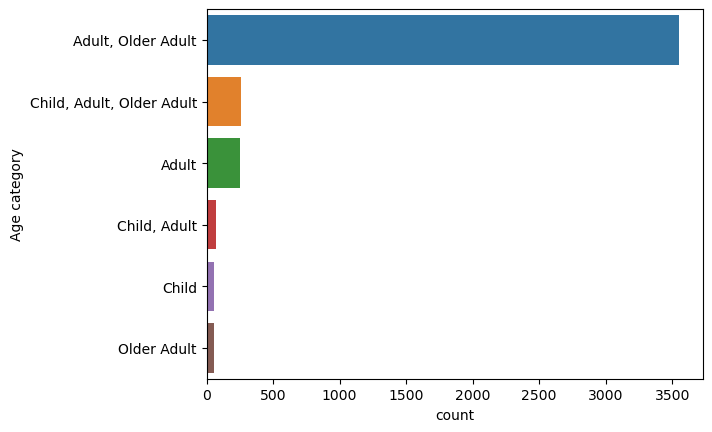

In [15]:
clinical_trials["Age category"] = clinical_trials["Age"].str.split('(').str[1].str.split(')').str[0]

# we can get the values to the console
print(clinical_trials["Age category"].value_counts())

# or use a librart to make a chart with the data, which could be more intuitive for visual comparison
sns.countplot(y=clinical_trials["Age category"])

This is interesting, simply by exploring the data, we can already conclude that around April 2020, most clinical trials were targetting Adults and Older Adults rather than children. The analysis is not as clean as it could be, because some of the categories are still mixed together. I leave the task of doing further cleaning of this field to you as an exercise (such cleaning was part of the Python Assessment at the beginning of the course)

Let's pick another column and do a similar analysis:

<Axes: xlabel='count', ylabel='Phases'>

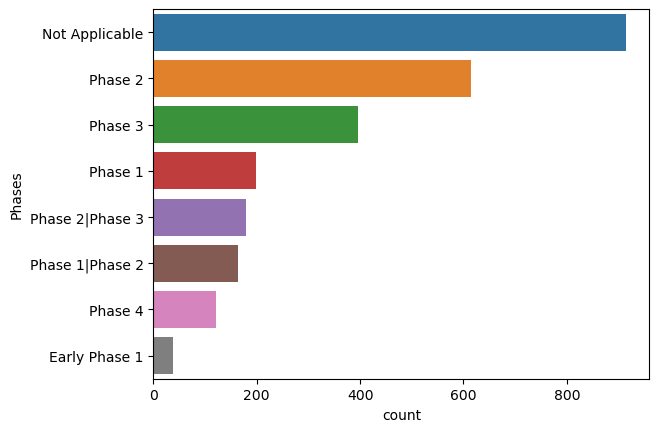

In [16]:
sns.countplot(y=clinical_trials["Phases"],
              order=clinical_trials["Phases"].value_counts().index
             )

## Long vs narrow data

The previous dataset was in record, or "wide" format. That format is intuitive because we can mentally map a row to a "record" with properties.
This can get complicated however, if a particular field should contain a list of values instead of a single value. The previous dataset decided to 
use a secondary (and tertiary, and even quaternary) level of separation, with another separation character.

A popular alternative, due to its simplicity, is the Long format, which spreads a single record across multiple rows, and this allows us to avoid dealing with so many separators... let's look at one example. I'm going to load a dataset in long format, and I will create a wide datastet by [pivoting](https://pandas.pydata.org/docs/user_guide/reshaping.html) it (although in this case, with some data loss).

In [17]:
drugbank = pd.read_pickle('data/drugbank.pkl')
# Let's do a simple (but lossy) pivot of the data
db_long = drugbank.pivot_table(index='DrugBank ID', columns='variable', values='value', aggfunc=min)

D:\user\B51063\AppData\Local\Temp\ipykernel_2052\1233458734.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  db_long = drugbank.pivot_table(index='DrugBank ID', columns='variable', values='value', aggfunc=min)


In [18]:
drugbank

,DrugBank ID,variable,value
0,DB12783,Synonym,Benserazide
1,DB12783,Synonym,benserazida
2,DB12783,Synonym,benserazidum
3,DB12789,Synonym,Dinoprost
4,DB12789,Synonym,dinoprosta
...,...,...,...
2931102,DB01221,InchiKey,YQEZLKZALYSWHR-UHFFFAOYSA-N
2931103,DB01226,InchiKey,ILVYCEVXHALBSC-OTBYEXOQSA-N
2931104,DB01227,InchiKey,XBMIVRRWGCYBTQ-AVRDEDQJSA-N
2931105,DB01224,InchiKey,URKOMYMAXPYINW-UHFFFAOYSA-N


In [19]:
db_long

variable,ATC,Group,InchiKey,Interaction,Name,Pathway,SMILES,Synonym,Target
DrugBank ID,,,,,,,,,
DB00001,B01AE02,approved,NaN,DB00006,Lepirudin,P00451,NaN,Hirudin variant-1,P00734
DB00002,L01XC06,approved,NaN,DB00012,Cetuximab,P00533,NaN,Cetuximab,O75015
DB00003,R05CB13,approved,NaN,NaN,Dornase alfa,NaN,NaN,Deoxyribonuclease (human clone 18-1 protein mo...,NaN
DB00004,L01XX29,approved,NaN,DB00012,Denileukin diftitox,NaN,NaN,Denileukin,P01589
DB00005,L04AB01,approved,NaN,DB00008,Etanercept,NaN,NaN,Etanercept,O75015
...,...,...,...,...,...,...,...,...,...
DB15595,NaN,approved,NaN,DB00002,"Ebola Zaire vaccine (live, attenuated)",NaN,NaN,"Ebola Zaire Vaccine (rVSVG-ZEBOV-GP, live)",NaN
DB15596,NaN,experimental,YZQNFFLGIYEXMM-UHFFFAOYSA-N,NaN,Aminopromazine,NaN,CN(C)CC(CN1C2=CC=CC=C2SC2=C1C=CC=C2)N(C)C,Aminopromazina,NaN
DB15597,NaN,experimental,NARHAGIVSFTMIG-UHFFFAOYSA-N,NaN,Aminopentamide,NaN,CC(CC(C(N)=O)(C1=CC=CC=C1)C1=CC=CC=C1)N(C)C,Aminopentamide,NaN


We can see that `drugbank` has only 3 columns, and that the values of the `DrugBank ID` and `variable` columns are repeated. This, however, is very useful to quickly aggregate statistics in Pandas, without going through the cleaning process of separating fields with multiple values. For instance, let's make a count plot of the groups of the drug:

<Axes: xlabel='count', ylabel='value'>

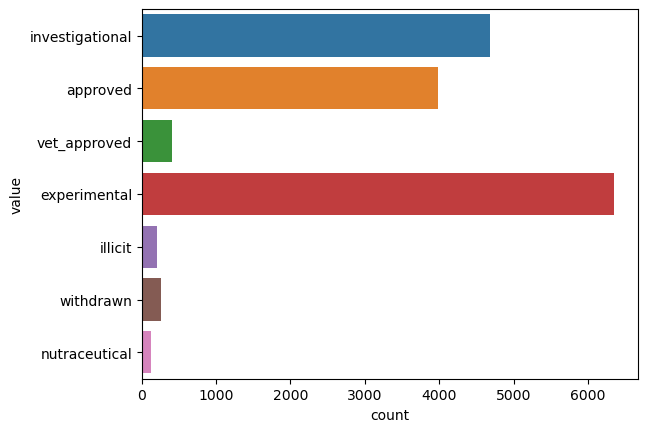

In [20]:
# We start by making a boolean mask to select only the rows with the property we want
condition = drugbank['variable'] == 'Group'
sns.countplot(y=drugbank.loc[condition, 'value'])

Because a drug can be in multiple groups simultaneously, getting the same result from the wide format is way more difficult (actually impossible if we use the pivot I did above, because we kept only one of the groups for each drug). 

Now, let's do a more complex calculation. Let's extract the distribution of drug targets. 

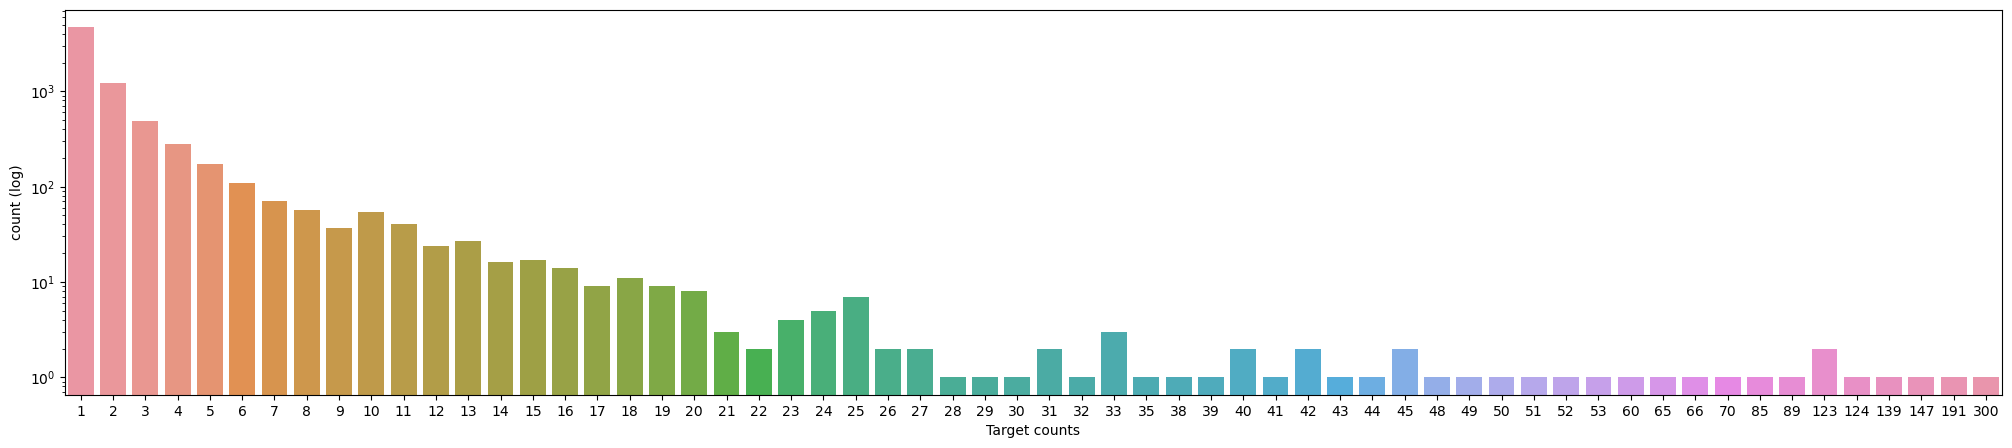

In [25]:
condition = drugbank['variable'] == 'Target'

# let's make a wider figure, so it's readable
fig, ax = plt.subplots(figsize=(25, 5))
# we make the plot (notice the call to value_counts
sns.countplot(x=drugbank.loc[condition, 'DrugBank ID'].value_counts(), ax=ax)

# set a logarithmic scale for the plot
ax.set_yscale('log') 

# set sensible labels for the axis
ax.set_ylabel('count (log)') 
ax.set_xlabel('Target counts') 

plt.show()
plt.close('all')

## Useful patterns

The usage of Pandas will be unique for every project and particular characteristics of the dataset you're dealing with on that context.

However, there are some patterns that will be useful in most cases. This is a very non-comprehensive set of examples.

### Loading from non-standard formats

Often, it is impossible to get a "clean" dataset where every field is separated perfectly, and very often you will need to write a little parser for the data.

Let's have a look at the file contained in `data/example_data.txt`

In [22]:
with open('data/example_data.txt') as f:
    print(f.read())

! This is a comment, and should be ignored
! The file has 5 space separated fields, the last field is a comment, and can contain spaces.
field1 field2 field3 field4 field5
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment
123 0.123 456 .456 this is some comment


The header describes the format of the file, and it's pretty simple to understand. 

However, we'll have some trouble attempting to read this file using the built-in functions in Pandas:

In [23]:
pd.read_table('data/example_data.txt', comment='!', sep=' ')

field1 field2 field3 field4   field5
123 0.123 456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment
          456   0.456   this     is   some  comment

A file with this format is famously (or infamously) the output of HMMER, a tool for aligning protein sequences based on Hidden Markov Models. The solution in this case, is to parse the lines ourselves, and build a dictionary or list of dataclasses to populate out `DataFrame`. For simplicity, I will write a simple parser that does not require a dataclass:

In [24]:
# our simple parser splits the line up to 4 times (creating 5 pieces)
def parse_line(l):
    fields = l.strip().split(' ', 4)
    for i in range(4):
        fields[i] = float(fields[i])
    return fields

columns = ['field1', 'field2', 'field3', 'field4', 'field5']
data = {c:[] for c in columns}

skip_header = True
with open('data/example_data.txt') as f:
    for line in f:
        if line[0] == '!':
            continue
        if skip_header:
            skip_header = False
            continue
        fields = parse_line(line)
        for c, f in zip(columns, fields):
            data[c].append(f)
df = pd.DataFrame(data)
df

,field1,field2,field3,field4,field5
0,123.0,0.123,456.0,0.456,this is some comment
1,123.0,0.123,456.0,0.456,this is some comment
2,123.0,0.123,456.0,0.456,this is some comment
3,123.0,0.123,456.0,0.456,this is some comment
4,123.0,0.123,456.0,0.456,this is some comment
5,123.0,0.123,456.0,0.456,this is some comment
6,123.0,0.123,456.0,0.456,this is some comment
7,123.0,0.123,456.0,0.456,this is some comment
8,123.0,0.123,456.0,0.456,this is some comment
9,123.0,0.123,456.0,0.456,this is some comment


## Copies and Views

Like NumPy, the underlying assumption for Pandas data structures is that you get a view of the object when you slice it, rather than a copy. In Pandas, however, we often use very complex selection patterns, that force Pandas to return a copy instead. 

A very common mistake is to "update" some values on a copy instead of a view, and assume that the original dataset is being modified. Dealing with this can be quite tricky, but fortunately, we won't need to do such kind of data cleaning during the course.

Nevertheless, I think it's quite important that you are aware of this, and to point you to the [relevant documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)